# 베이스라인 모델 발전시키기

1. node 수 조절
    - 세 개의 hidden layer의 unit 수를 각각 input_dim의 2배, 1배, 1/2배로 설정   
     
     
2. hidden layer 추가
    - hidden layer를 추가하여 총 4개의 hidden layer 생성
    - 각 layer의 unit 수를 2배, 3/2배, 1배, 1/2배로 설정
    
    
3. batch size 조절
    - batch size가 큰 경우: 기울기를 계산하기 위해 더 많은 데이터를 사용하게 됨. 최적화시켜야하는 전체 데이터를 사용한 해공간의 기울기 값고 유사한 기울기를 사용하므로 최적화가 더 수월해질 수 있지만 실제 최적화 시켜야할 문제 공간이 평평한 경우에는 실제와 유사하게 근사된 기울기의 절대값이 작아 수렴 속도가 매우 느려질 수 있음. 극단적인 경우에는 local minima or saddle point에 빠져서 loss가 줄어들지 않을 수도 있음.    
    
    - batch size가 작은 경우 상대적으로 부정확한 기울기를 사용한다는 단점이 있지만 한 번의 업데이터에 적은 계산 비용이 들어가 한 번 업데이트 할 동안 여러번의 업데이트를 수행할 수 있고 기울기의 부정확한 면이 랜덤성으로 작용해 실제 기울기가 낮은 구간이나 local minima or saddle point에서 쉽게 벗어날 가능성이 있음.
     
     
4. epoch 조절
    - 학습하는 양을 늘리며 overfitting이 되지않도록 함.

In [8]:
#데이터를 불러옵니다.
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # warning message 안나오도록함.

#케라스를 통해 모델 생성을 시작합니다.
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Using TensorFlow backend.
C:\Users\a0105\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\a0105\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\a0105\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\a0105\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
#독립변수와 종속변수를 분리합니다.
train_X = train.iloc[:,4:]
train_Y = train.iloc[:,0:4]
test_X = test.iloc[:,1:]

In [4]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(BatchNormalization())
model.add(Dense(units=226, activation='relu'))   # 두번째 은닉층  
model.add(BatchNormalization())
model.add(Dense(units=113, activation='relu'))   # 세번째 은닉층
model.add(BatchNormalization())
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

In [5]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [6]:
history = model.fit(train_X, train_Y, epochs=30, batch_size=1000, validation_split = 0.05)


Train on 769500 samples, validate on 40500 samples
Epoch 1/30
769500/769500 [==============================] - 27s 35us/step - loss: 109.8925 - mae: 109.8925 - val_loss: 72.2479 - val_mae: 72.2479
Epoch 2/30
769500/769500 [==============================] - 27s 36us/step - loss: 44.7987 - mae: 44.7987 - val_loss: 54.2952 - val_mae: 54.2952
Epoch 3/30
769500/769500 [==============================] - 27s 35us/step - loss: 31.6174 - mae: 31.6174 - val_loss: 44.3628 - val_mae: 44.3628
Epoch 4/30
769500/769500 [==============================] - 28s 36us/step - loss: 26.7964 - mae: 26.7964 - val_loss: 43.9438 - val_mae: 43.9438
Epoch 5/30
769500/769500 [==============================] - 29s 37us/step - loss: 24.1662 - mae: 24.1662 - val_loss: 42.7789 - val_mae: 42.7789
Epoch 6/30
769500/769500 [==============================] - 30s 39us/step - loss: 22.5039 - mae: 22.5040 - val_loss: 39.8026 - val_mae: 39.8026
Epoch 7/30
769500/769500 [==============================] - 31s 40us/step - loss: 

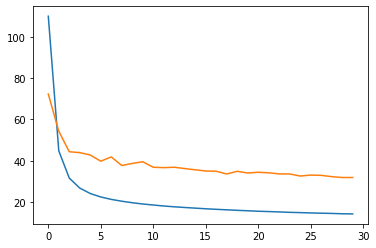

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [8]:
pred_test = model.predict(test_X)

In [9]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_30_batch_add.csv') # 14.437 그냥 scaler 한 것의 성능이 더 좋음. 
# submission.to_csv('submission2_30.csv')   # 24.890   # epoch 500으로 늘리면 12.870

* epoch를 500으로 늘리고 unit 수를 feature 개수의 배수로 지정했을 때 24.890 점수가 나옴.    


* 배치정규화(BatchNormalization)를 이용하여 gradient vanishing 현상이 일어나지 않고 안정적으로 학습될 수 있도록함. 

    - 배치정규화: input의 분포가 달라져 Internal Covariance Shift 현상으로 인해 gradient vanishing가 발생하는 것을 막기 위해 input값을 평균 0, 분산1로 정규화하여 네트워크의 학습이 안정적으로 일어나도록 함. 
        - batch_size 값에 따라 가중치를 업데이터하는 것으로 각 batch_size 개수만큼의 데이터 인스턴스가 feature별로 정규화됨. 
        - 장점
            - 초기 learning rate를 크게 설정해도 안정적으로 수렴할 수 있음.
            - activation 값을 적당한 크기로 유지하기 때문에 gradient vanishing 현상을 어느정도 막을 수 있음.
            - input의 분포들이 안정화되면서 손실함수가 더 빠르고 더 좋은 값으로 수렴할 수 있음.
            
---

### 표준 정규화 적용 후 비교 

In [5]:
scaler = StandardScaler()

# fit은 train에만 
train_x = scaler.fit_transform(train_X)
test_x = scaler.transform(test_X)

train_y = scaler.fit_transform(train_Y)

In [4]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=226, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=113, activation='relu'))   # 세번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

Using TensorFlow backend.


In [16]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [18]:
history = model.fit(train_x, train_y, epochs=30, batch_size=1000, validation_split = 0.05)

Train on 769500 samples, validate on 40500 samples
Epoch 1/30
769500/769500 [==============================] - 25s 33us/step - loss: 0.2244 - mae: 0.2244 - val_loss: 0.3980 - val_mae: 0.3980
Epoch 2/30
769500/769500 [==============================] - 26s 33us/step - loss: 0.2072 - mae: 0.2072 - val_loss: 0.3634 - val_mae: 0.3634
Epoch 3/30
769500/769500 [==============================] - 25s 33us/step - loss: 0.1945 - mae: 0.1945 - val_loss: 0.3710 - val_mae: 0.3710
Epoch 4/30
769500/769500 [==============================] - 26s 33us/step - loss: 0.1843 - mae: 0.1843 - val_loss: 0.3583 - val_mae: 0.3583s - loss: 0.1845 -
Epoch 5/30
769500/769500 [==============================] - 25s 32us/step - loss: 0.1761 - mae: 0.1761 - val_loss: 0.3485 - val_mae: 0.3485
Epoch 6/30
769500/769500 [==============================] - 26s 33us/step - loss: 0.1693 - mae: 0.1693 - val_loss: 0.3528 - val_mae: 0.3528
Epoch 7/30
769500/769500 [==============================] - 25s 33us/step - loss: 0.1628 - 

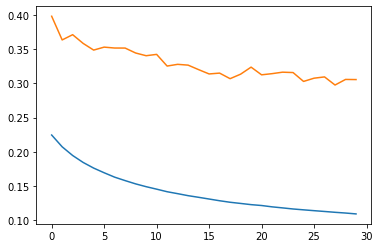

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

mae가 줄어드는 양상에서 오버피팅이 일어나는 것으로 추측

In [20]:
pred_test = model.predict(test_x)

In [21]:
pred_test = scaler.inverse_transform(pred_test)

In [22]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler.csv')   # 9.1956

표준정규화 적용 후 24.89 -> 9.19로 점수가 줄어듦.

---

### hidden layer 추가

In [8]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dropout(0.2))
model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
model.add(Dropout(0.2))
model.add(Dense(units=226, activation='relu'))   # 두번째 은닉층  
model.add(Dropout(0.2))
model.add(Dense(units=113, activation='relu'))   # 세번째 은닉층
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

In [9]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [10]:
history = model.fit(train_x, train_y, epochs=30, batch_size=1000, validation_split = 0.05)  


Train on 769500 samples, validate on 40500 samples
Epoch 1/30
769500/769500 [==============================] - 50s 65us/step - loss: 0.5492 - mae: 0.5492 - val_loss: 0.5195 - val_mae: 0.5195
Epoch 2/30
769500/769500 [==============================] - 49s 64us/step - loss: 0.3972 - mae: 0.3972 - val_loss: 0.4392 - val_mae: 0.4392
Epoch 3/30
769500/769500 [==============================] - 49s 64us/step - loss: 0.3386 - mae: 0.3386 - val_loss: 0.3788 - val_mae: 0.3788
Epoch 4/30
769500/769500 [==============================] - 47s 62us/step - loss: 0.3076 - mae: 0.3076 - val_loss: 0.3662 - val_mae: 0.3662
Epoch 5/30
769500/769500 [==============================] - 47s 61us/step - loss: 0.2889 - mae: 0.2889 - val_loss: 0.3398 - val_mae: 0.3398
Epoch 6/30
769500/769500 [==============================] - 49s 63us/step - loss: 0.2753 - mae: 0.2753 - val_loss: 0.3284 - val_mae: 0.3284
Epoch 7/30
769500/769500 [==============================] - 46s 60us/step - loss: 0.2660 - mae: 0.2660 - val

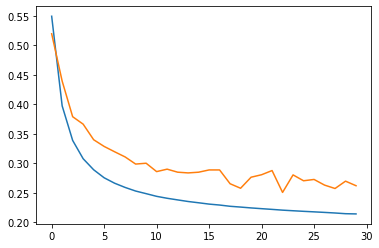

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

hidden layer를 추가하고 dropout을 한 결과 오버피팅이 조금 해소된 것으로 보임.

In [13]:
pred_test = model.predict(test_x)

In [14]:
pred_test = scaler.inverse_transform(pred_test)

In [15]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_hidden_layer_add_drop_out.csv')  # 8.639 
#submission.to_csv('submission2_scaler_hidden_layer_add.csv')   # 5.0256

dropout을 통해 오버피팅이 해소된 것으로 보였으나 dropout을 하지 않았을때의 성능이 더 좋음 

### epoch 수 증가

In [48]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dropout(0.2))
model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
model.add(Dropout(0.2))
model.add(Dense(units=226, activation='relu'))   # 세번째 은닉층  
model.add(Dropout(0.2))
model.add(Dense(units=113, activation='relu'))   # 네번째 은닉층
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

history = model.fit(train_x, train_y, epochs=300, batch_size=1000, validation_split = 0.05)  

Train on 769500 samples, validate on 40500 samples
Epoch 1/500
769500/769500 [==============================] - 27s 35us/step - loss: 0.3932 - mae: 0.3932 - val_loss: 0.4556 - val_mae: 0.4556
Epoch 2/500
769500/769500 [==============================] - 34s 44us/step - loss: 0.2339 - mae: 0.2339 - val_loss: 0.3896 - val_mae: 0.3896
Epoch 3/500
769500/769500 [==============================] - 29s 37us/step - loss: 0.1845 - mae: 0.1845 - val_loss: 0.3655 - val_mae: 0.3655
Epoch 4/500
769500/769500 [==============================] - 27s 35us/step - loss: 0.1575 - mae: 0.1575 - val_loss: 0.3336 - val_mae: 0.3336
Epoch 5/500
769500/769500 [==============================] - 29s 37us/step - loss: 0.1388 - mae: 0.1388 - val_loss: 0.3259 - val_mae: 0.3259
Epoch 6/500
769500/769500 [==============================] - 28s 36us/step - loss: 0.1262 - mae: 0.1262 - val_loss: 0.2982 - val_mae: 0.2982
Epoch 7/500
769500/769500 [==============================] - 28s 36us/step - loss: 0.1165 - mae: 0.1165

769500/769500 [==============================] - 23s 31us/step - loss: 0.0362 - mae: 0.0362 - val_loss: 0.2007 - val_mae: 0.2007
Epoch 116/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0360 - mae: 0.0360 - val_loss: 0.2002 - val_mae: 0.20020360 - m
Epoch 117/500
769500/769500 [==============================] - 23s 30us/step - loss: 0.0360 - mae: 0.0360 - val_loss: 0.2035 - val_mae: 0.2035
Epoch 118/500
769500/769500 [==============================] - 23s 30us/step - loss: 0.0358 - mae: 0.0358 - val_loss: 0.2076 - val_mae: 0.2076
Epoch 119/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0359 - mae: 0.0359 - val_loss: 0.1940 - val_mae: 0.1940
Epoch 120/500
769500/769500 [==============================] - 23s 30us/step - loss: 0.0355 - mae: 0.0355 - val_loss: 0.2074 - val_mae: 0.2074
Epoch 121/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0358 - mae: 0.0358 - val_loss: 0.1991 - val_mae: 0.1991
Epoch

769500/769500 [==============================] - 26s 34us/step - loss: 0.0304 - mae: 0.0304 - val_loss: 0.1957 - val_mae: 0.1957
Epoch 230/500
769500/769500 [==============================] - 26s 34us/step - loss: 0.0301 - mae: 0.0301 - val_loss: 0.2045 - val_mae: 0.2045
Epoch 231/500
769500/769500 [==============================] - 25s 32us/step - loss: 0.0310 - mae: 0.0310 - val_loss: 0.2034 - val_mae: 0.2034
Epoch 232/500
769500/769500 [==============================] - 25s 32us/step - loss: 0.0304 - mae: 0.0304 - val_loss: 0.2036 - val_mae: 0.2036
Epoch 233/500
769500/769500 [==============================] - 25s 32us/step - loss: 0.0303 - mae: 0.0303 - val_loss: 0.1950 - val_mae: 0.1950
Epoch 234/500
769500/769500 [==============================] - 27s 35us/step - loss: 0.0303 - mae: 0.0303 - val_loss: 0.2030 - val_mae: 0.2030
Epoch 235/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0306 - mae: 0.0306 - val_loss: 0.1932 - val_mae: 0.1932
Epoch 236/500

769500/769500 [==============================] - 23s 30us/step - loss: 0.0283 - mae: 0.0283 - val_loss: 0.2010 - val_mae: 0.2010
Epoch 344/500
769500/769500 [==============================] - 23s 30us/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.1923 - val_mae: 0.1923
Epoch 345/500
769500/769500 [==============================] - 23s 30us/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.2063 - val_mae: 0.2063
Epoch 346/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.2031 - val_mae: 0.2031
Epoch 347/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0282 - mae: 0.0282 - val_loss: 0.2001 - val_mae: 0.2001
Epoch 348/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0281 - mae: 0.0281 - val_loss: 0.2076 - val_mae: 0.2076
Epoch 349/500
769500/769500 [==============================] - 24s 31us/step - loss: 0.0281 - mae: 0.0281 - val_loss: 0.2022 - val_mae: 0.2022s - loss: 0.02

769500/769500 [==============================] - 36s 47us/step - loss: 0.0265 - mae: 0.0265 - val_loss: 0.2024 - val_mae: 0.2024
Epoch 457/500
769500/769500 [==============================] - 36s 47us/step - loss: 0.0272 - mae: 0.0272 - val_loss: 0.2067 - val_mae: 0.2067
Epoch 458/500
769500/769500 [==============================] - 37s 48us/step - loss: 0.0269 - mae: 0.0269 - val_loss: 0.2094 - val_mae: 0.2094
Epoch 459/500
769500/769500 [==============================] - 36s 47us/step - loss: 0.0275 - mae: 0.0275 - val_loss: 0.1950 - val_mae: 0.1950
Epoch 460/500
769500/769500 [==============================] - 36s 47us/step - loss: 0.0265 - mae: 0.0265 - val_loss: 0.2158 - val_mae: 0.2158
Epoch 461/500
769500/769500 [==============================] - 36s 47us/step - loss: 0.0271 - mae: 0.0271 - val_loss: 0.2120 - val_mae: 0.2120
Epoch 462/500
769500/769500 [==============================] - 37s 48us/step - loss: 0.0271 - mae: 0.0271 - val_loss: 0.2203 - val_mae: 0.2203
Epoch 463/500

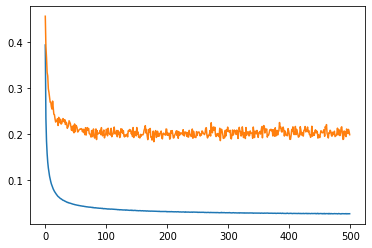

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [50]:
pred_test = model.predict(test_x)

In [51]:
pred_test = scaler.inverse_transform(pred_test)

In [52]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_hidden_layer_add_500.csv')  # 2.67

In [47]:
#submission 파일을 생성합니다.
'''sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_hidden_layer_add_150.csv')  # 3.2169996'''

epoch 수를 늘렸을 때 성능이 더 좋음. 

In [10]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(BatchNormalization())
model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
model.add(BatchNormalization())
model.add(Dense(units=226, activation='relu'))   # 세번째 은닉층  
model.add(BatchNormalization())
model.add(Dense(units=113, activation='relu'))   # 네번째 은닉층
model.add(BatchNormalization())
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

history = model.fit(train_x, train_y, epochs=30, batch_size=1000, validation_split = 0.05)  

Train on 769500 samples, validate on 40500 samples
Epoch 1/30
769500/769500 [==============================] - 53s 69us/step - loss: 0.4258 - mae: 0.4258 - val_loss: 0.5256 - val_mae: 0.5256
Epoch 2/30
769500/769500 [==============================] - 52s 68us/step - loss: 0.2752 - mae: 0.2752 - val_loss: 0.4489 - val_mae: 0.4489
Epoch 3/30
769500/769500 [==============================] - 57s 74us/step - loss: 0.2242 - mae: 0.2242 - val_loss: 0.4066 - val_mae: 0.4066
Epoch 4/30
769500/769500 [==============================] - 56s 73us/step - loss: 0.1943 - mae: 0.1943 - val_loss: 0.3782 - val_mae: 0.3782
Epoch 5/30
769500/769500 [==============================] - 56s 73us/step - loss: 0.1740 - mae: 0.1740 - val_loss: 0.3658 - val_mae: 0.3658
Epoch 6/30
769500/769500 [==============================] - 53s 69us/step - loss: 0.1584 - mae: 0.1584 - val_loss: 0.3450 - val_mae: 0.3450
Epoch 7/30
769500/769500 [==============================] - 53s 69us/step - loss: 0.1467 - mae: 0.1467 - val_

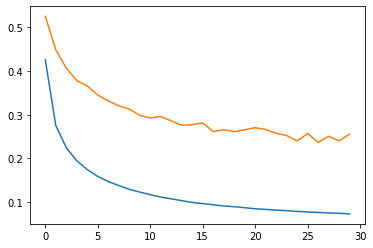

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [12]:
pred_test = model.predict(test_x)

In [13]:
pred_test = scaler.inverse_transform(pred_test)

In [14]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler_batchnorm.csv')  # batchnorm 추가한 결과 5.56 
# standard scaler 적용 후에는 batchnorm을 안했을 때 성능이 더 좋음. 

#### 최종적으로 scaler 적용, hidden layer를 추가하여 (4개의 층이 생성됨), epoch = 500으로 했을 때 점수가 2.67로 가장 좋았음.

---

### K-flod

In [26]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

import numpy   # Function to create model, required for KerasClassifier 

def create_model(): # create model 

    model = Sequential()  # model 초기화 
    model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
    model.add(Dense(units=339, activation='relu'))   # 두번째 은닉층  
    model.add(Dense(units=226, activation='relu'))   # 세번째 은닉층  
    model.add(Dense(units=113, activation='relu'))   # 네번째 은닉층
    model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

    # Compile model 
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])    
    
    return model   # fix random seed for reproducibility 

seed = 7 

numpy.random.seed(seed)


In [29]:
# create model 
model = KerasRegressor(build_fn=create_model, epochs=150, batch_size=1000, verbose=0)   

In [30]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed) 

In [ ]:
kfold

In [ ]:
tqdm_notebook(results = cross_val_score(model, train_x, train_y, cv=kfold))

In [ ]:
pred_test  = estimator.predict(test_x)
pred_test = scaler.inverse_transform(pred_test)

In [ ]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission_kfold.csv')  

k-fold는 너무 오래 걸려 시간 관계상 하지 못하여 다음 주에 돌린 후 결과 공유해보겠습니다!